In [10]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import numpy as np

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("./parquet/run1024_srppac.parquet").select("id_x","timing_x","charge_x","id_y","timing_y","charge_y")
df.show(5)

+----------------+--------------------+--------------------+------------+--------------------+--------------------+
|            id_x|            timing_x|            charge_x|        id_y|            timing_y|            charge_y|
+----------------+--------------------+--------------------+------------+--------------------+--------------------+
|[19, 18, 20, 17]|[-44.051576535719...|[70.5270277549643...|[11, 12, 10]|[-41.310176338542...|[55.5458377558607...|
|     [10, 9, 11]|[-42.025995703581...|[62.9060027193190...|    [27, 26]|[-40.585111756794...|[48.9531332672850...|
|    [16, 15, 17]|[-44.406324777053...|[74.6666320960066...|[12, 13, 11]|[-40.184183537334...|[58.7424054612129...|
|      [9, 10, 8]|[-44.229153347894...|[65.3586768704790...|[15, 14, 16]|[-40.862621085605...|[57.2571760256742...|
|    [17, 18, 16]|[-41.710700130162...|[54.7650491670356...|[20, 21, 19]|[-41.815511900756...|[63.6910622644354...|
+----------------+--------------------+--------------------+------------

Statistics:
[[0.0000e+00 1.0800e+02 0.0000e+00]
 [0.0000e+00 4.6229e+04 0.0000e+00]
 [0.0000e+00 2.9000e+01 0.0000e+00]]
Statistics:
[[0.0000e+00 7.3000e+01 0.0000e+00]
 [0.0000e+00 4.4022e+04 0.0000e+00]
 [0.0000e+00 1.1000e+01 0.0000e+00]]
Statistics:
[[    0.     0.     0.]
 [    0. 46366.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 44106.     0.]
 [    0.     0.     0.]]


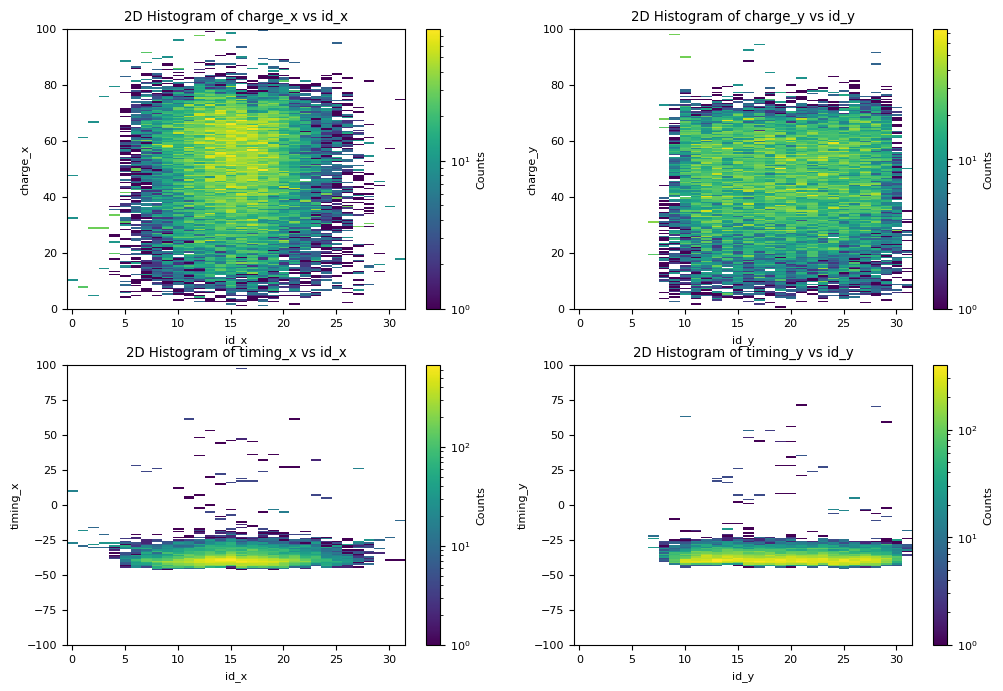

In [11]:
from hist.sparkHist2d import Hist2DArrays
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,8))
plt.rcParams["font.size"] = 8
plt.subplot2grid((2,2),(0,0))
h = Hist2DArrays(df, ["id_x","charge_x"], [33,200], [[-0.5, 31.5], [0, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(0,1))
h = Hist2DArrays(df, ["id_y","charge_y"], [33,200], [[-0.5, 31.5], [0, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,0))
h = Hist2DArrays(df, ["id_x","timing_x"], [33,200], [[-0.5, 31.5], [-100, 100]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,1))
h = Hist2DArrays(df, ["id_y","timing_y"], [33,200], [[-0.5, 31.5], [-100, 100]], norm=LogNorm(), interpolation='none')

plt.show()